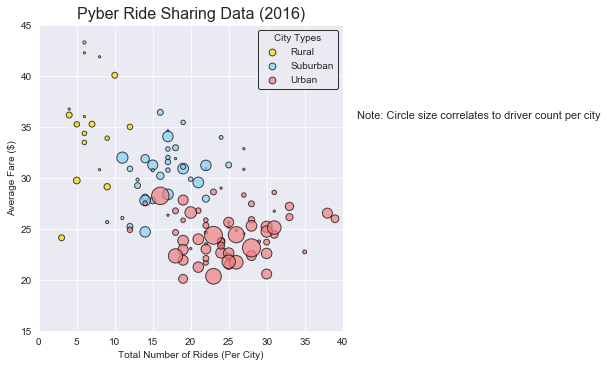

In [11]:
%matplotlib inline
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

city_data = os.path.join('city_data.csv')
ride_data = os.path.join('ride_data.csv')

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

combined_df = pd.merge(city_data_df, ride_data_df, how='outer', on='city')

bubble_df1 = combined_df.groupby(['type', 'city'], as_index=True).mean()['fare'].to_frame().reset_index()
bubble_df2 = combined_df.groupby(['type', 'city'], as_index=True).count()['ride_id'].to_frame().reset_index()
bubble_df3 = combined_df.groupby(['type', 'city'], as_index=True).mean()['driver_count'].to_frame().reset_index()

merged_bubble = pd.merge(bubble_df1, bubble_df2, on=['type','city'])
merged_bubble = pd.merge(merged_bubble, bubble_df3, on=['type','city'])
merged_bubble = merged_bubble.rename(columns={'fare':'avg_fare', 'ride_id':'num_rides', 'driver_count':'num_drivers'})

merged_bubble.head()

size=5*merged_bubble['num_drivers']

sns.lmplot(x="num_rides",y="avg_fare",data=merged_bubble,fit_reg=False,hue="type", legend_out=False,
           size=5,scatter_kws={"s": size,'linewidths':1,'edgecolor':'black', 'alpha':'0.7'},
           palette=dict(Rural="gold", Suburban="lightskyblue", Urban="lightcoral"))

sns.set_style('darkgrid')

plt.legend(title="City Types",loc="best",markerscale=0.5,edgecolor="black")

plt.xlim(0,40)
plt.ylim(15,45)

plt.title("Pyber Ride Sharing Data (2016)", fontsize=16)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
caption = "Note: Circle size correlates to driver count per city"
plt.figtext(1, .7, caption, fontsize=11)
plt.show()

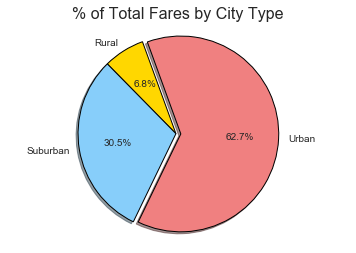

In [12]:
fares_by_type = combined_df.groupby(['type'], as_index=True).sum()['fare'].to_frame()
#fares_by_type.head()

labels = fares_by_type.index
sizes = fares_by_type
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.05)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=110, wedgeprops={'edgecolor':'black'})
plt.axis("equal")
plt.title("% of Total Fares by City Type", fontsize=16)
plt.show()

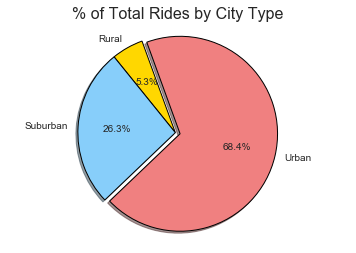

In [13]:
rides_by_type = combined_df.groupby(['type'], as_index=True).count()['ride_id'].to_frame()
labels = rides_by_type.index
sizes = rides_by_type
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.05)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=110, wedgeprops={'edgecolor':'black'})
plt.axis("equal")
plt.title("% of Total Rides by City Type", fontsize=16)
plt.show()

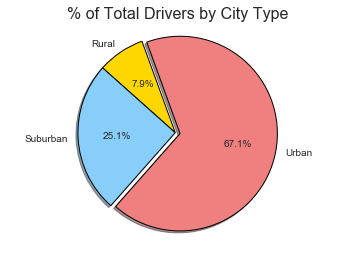

In [14]:
drivers_by_type = combined_df.groupby(['type'], as_index=True).mean()['driver_count'].to_frame()
labels = rides_by_type.index
sizes = drivers_by_type
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.05)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=110, wedgeprops={'edgecolor':'black'})
plt.axis("equal")
plt.title("% of Total Drivers by City Type", fontsize=16)
plt.show()